# CLINT WP5 040: MultiMaps of anomaly of drivers (w/r to 1981-2010) in detected areas and periods. 
## Upgrade to the use of historical CMCC-CM2-SR5
### 2023/10/12 - 2023/10/19 (suspended becaus of tasmax problems in CMCC-CM2)
## Upgrade to new drivers list
### 2023/10/26 - 2023/10/31


In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
import importlib
import seaborn as sns
#from mpl_toolkits import Basemap
import CLINT001_functions as clint
importlib.reload(clint)

<module 'CLINT001_functions' from '/home/b/b382649/CLINT_WP5/CLINT001_functions.py'>

In [2]:
## DIRECTORIES
machine = 'DKRZ'
kind = 'ERA5' #ERA5 or hist
experiment = 5


if machine == 'laptop':
    modeldir = '~/Documents/CMCC-GoogleDrive/ERA5/'
    metadatadir = '~/Library/Mobile\ Documents/com~apple~CloudDocs/CLINT/metadata/'
    maskdir = '~/Documents/CMCC-GoogleDrive/Mask_Clusters/Test3_Clusters/'
    plotdir = '/Users/squintu/Documents/CMCC-GoogleDrive/plots_for_reports/'
    
if machine == 'workstation':
    modeldir = '~/Documents/CMCC-GoogleDrive/ERA5/'
    metadatadir = '~/Library/Mobile\ Documents/com~apple~CloudDocs/CLINT/metadata/'
    maskdir = '~/Documents/CMCC-GoogleDrive/Mask_Clusters/Test3_Clusters/'
    plotdir = '/Users/antonellosquintu/Documents/CMCC-GoogleDrive/plots_for_reports/'

if machine == 'juno':
    repodir = '/home/b/b382649/CLINT_WP5'
    obsdir = repodir
    modeldir = f'/work/csp/as18623/CLINT_{kind}/'
    workmetadir = '/work/csp/as18623/CLINT_metadata/'
    metadatadir = '/data/csp/as18623/CLINT_metadata/'
    maskdir = '/data/csp/as18623/CLINT_metadata/Masks/Test3_Clusters/'
    plotdir = '/work/csp/as18623/CLINT_WP5/maps_and_plots/'
    
if machine == 'DKRZ':
    modeldir = f'/work/csp/as18623/CLINT_{kind}/' #where are the model data?    
    obsdir = '/home/b/b382649/CLINT_WP5/obs/'
    workmetadir = '/home/b/b382649/CLINT_WP5/metadata/'
    metadatadir = '/home/b/b382649/CLINT_WP5/metadata/'
    maskdir = '/data/csp/as18623/CLINT_metadata/Masks/Test3_Clusters/' #not necessary anymore
    plotdir = '/work/csp/as18623/CLINT_WP5/maps_and_plots/' #not plotting at the momenbt

In [3]:
modelspecs = pd.DataFrame({'kind':['ERA5','hist'],
                           'modelnames':['era5','CMCC-CM2-SR5'],#name of models
                           'members_list':[np.nan,np.array(range(3,12))]})#list of member numbers)

modelspecs = pd.DataFrame({'kind':['ERA5','hist'],
                           'modelnames':['era5','CMCC-CM2-SR5'],#name of models
                           'members_list':[np.nan,[3]]})#list of member numbers)


In [4]:
varspecs = pd.read_csv(f'{workmetadir}variables_specifications.csv')

In [5]:
## Open land-sea mask and round to integer
## The mask has values between 0 and 1 according to the proportion of the grid-point
##  which is covered by land
## Any gridpoint with more than 0.5 is rounded to 1 and considered land

lsm = xr.open_dataset(f'{metadatadir}/era5_lsm.nc').round()

In [7]:
### Read series of tmax and HWMI related to Lake Como
lchw = pd.read_csv(f'{obsdir}/LakeComo_tmax_HW.csv',index_col='date')

In [8]:
### Identify 2019 heat wave

row_maxHWMI = lchw.loc[lchw['Valle_HWintensity'].idxmax()]
date2019_dt = dt.strptime(row_maxHWMI.name,"%Y-%m-%d")
date2019_ts = pd.to_datetime(date2019_dt)

In [9]:
### Identify dates
date_aux_dt = dt.strptime(lchw.loc[lchw.year==1983]['Valle_HWintensity'].idxmax(),"%Y-%m-%d")
date_aux_ts = pd.to_datetime(date_aux_dt)

In [10]:
variables = ['sm']


In [11]:
## indicate the date of the events and the variables to be included

dates_ts = (pd.to_datetime("2022-07-22"), 
            pd.to_datetime("2019-06-27"), 
            pd.to_datetime("2003-08-11"), 
            pd.to_datetime("1983-07-21"))

## don't run too many dates at once otherwise the notebook won't open next time

dates_ts =[pd.to_datetime("2003-08-11")]
if kind == 'ERA5':
    houroffset = 0 #daily files of era5 are labeled with 00 UTC
else:
    houroffset = 12 #daily files of CMIP6 are labeled with 12 UTC

dates_ts1 = dates_ts
dates_ts = [d + pd.DateOffset(hours = houroffset) for d in dates_ts1]





In [12]:
dates_ts

[Timestamp('2003-08-11 00:00:00')]

In [13]:
if machine == 'DKRZ':
    print('We need to find out how to access the data')

We need to find out how to access the data


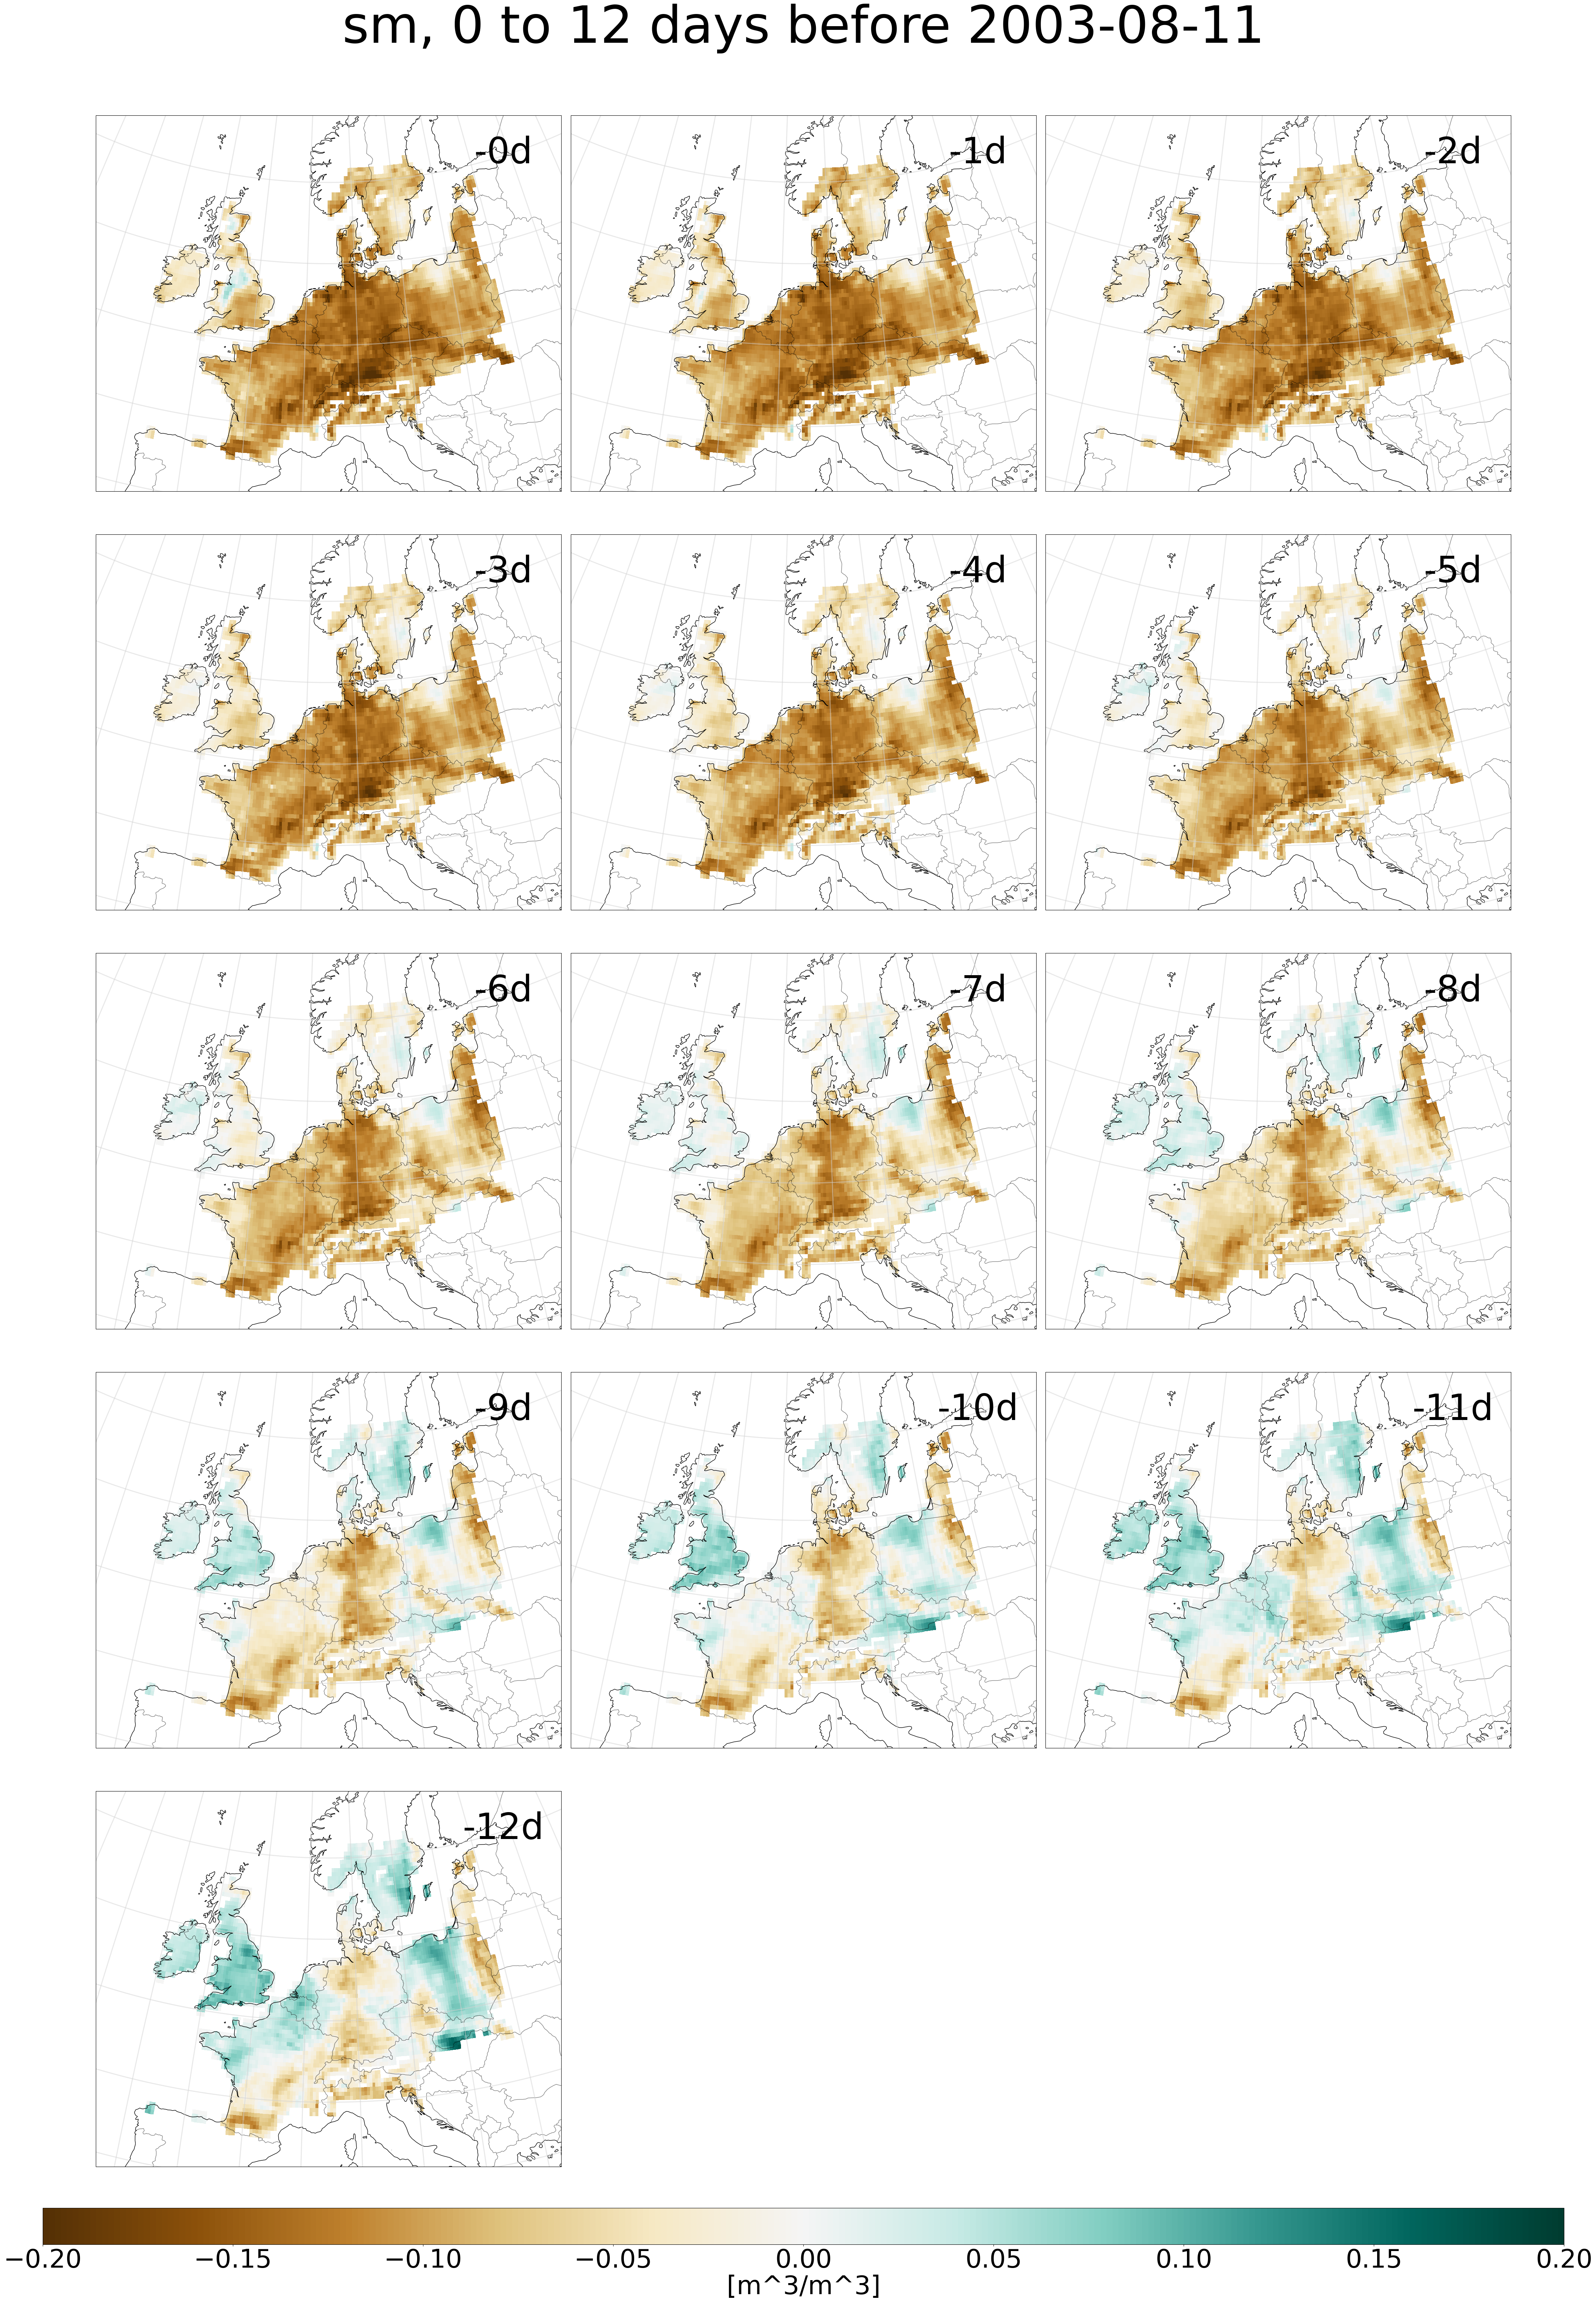

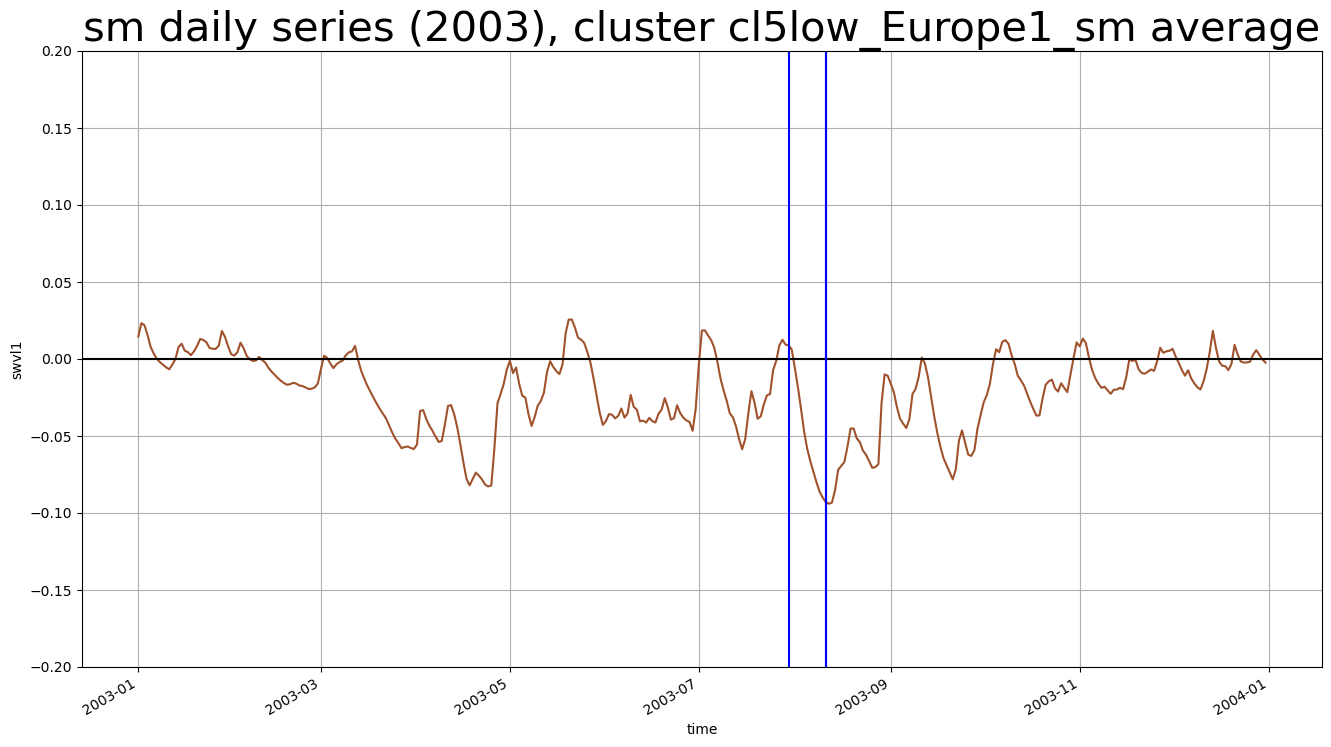

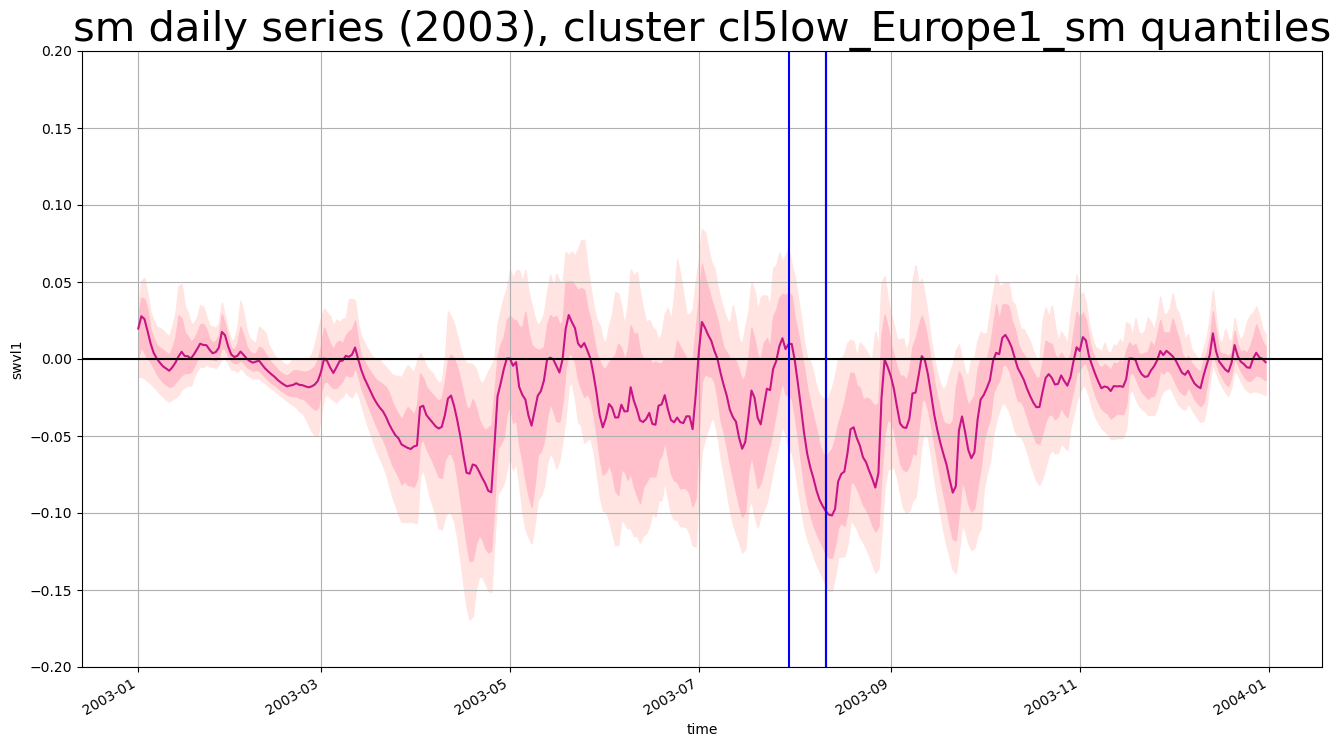

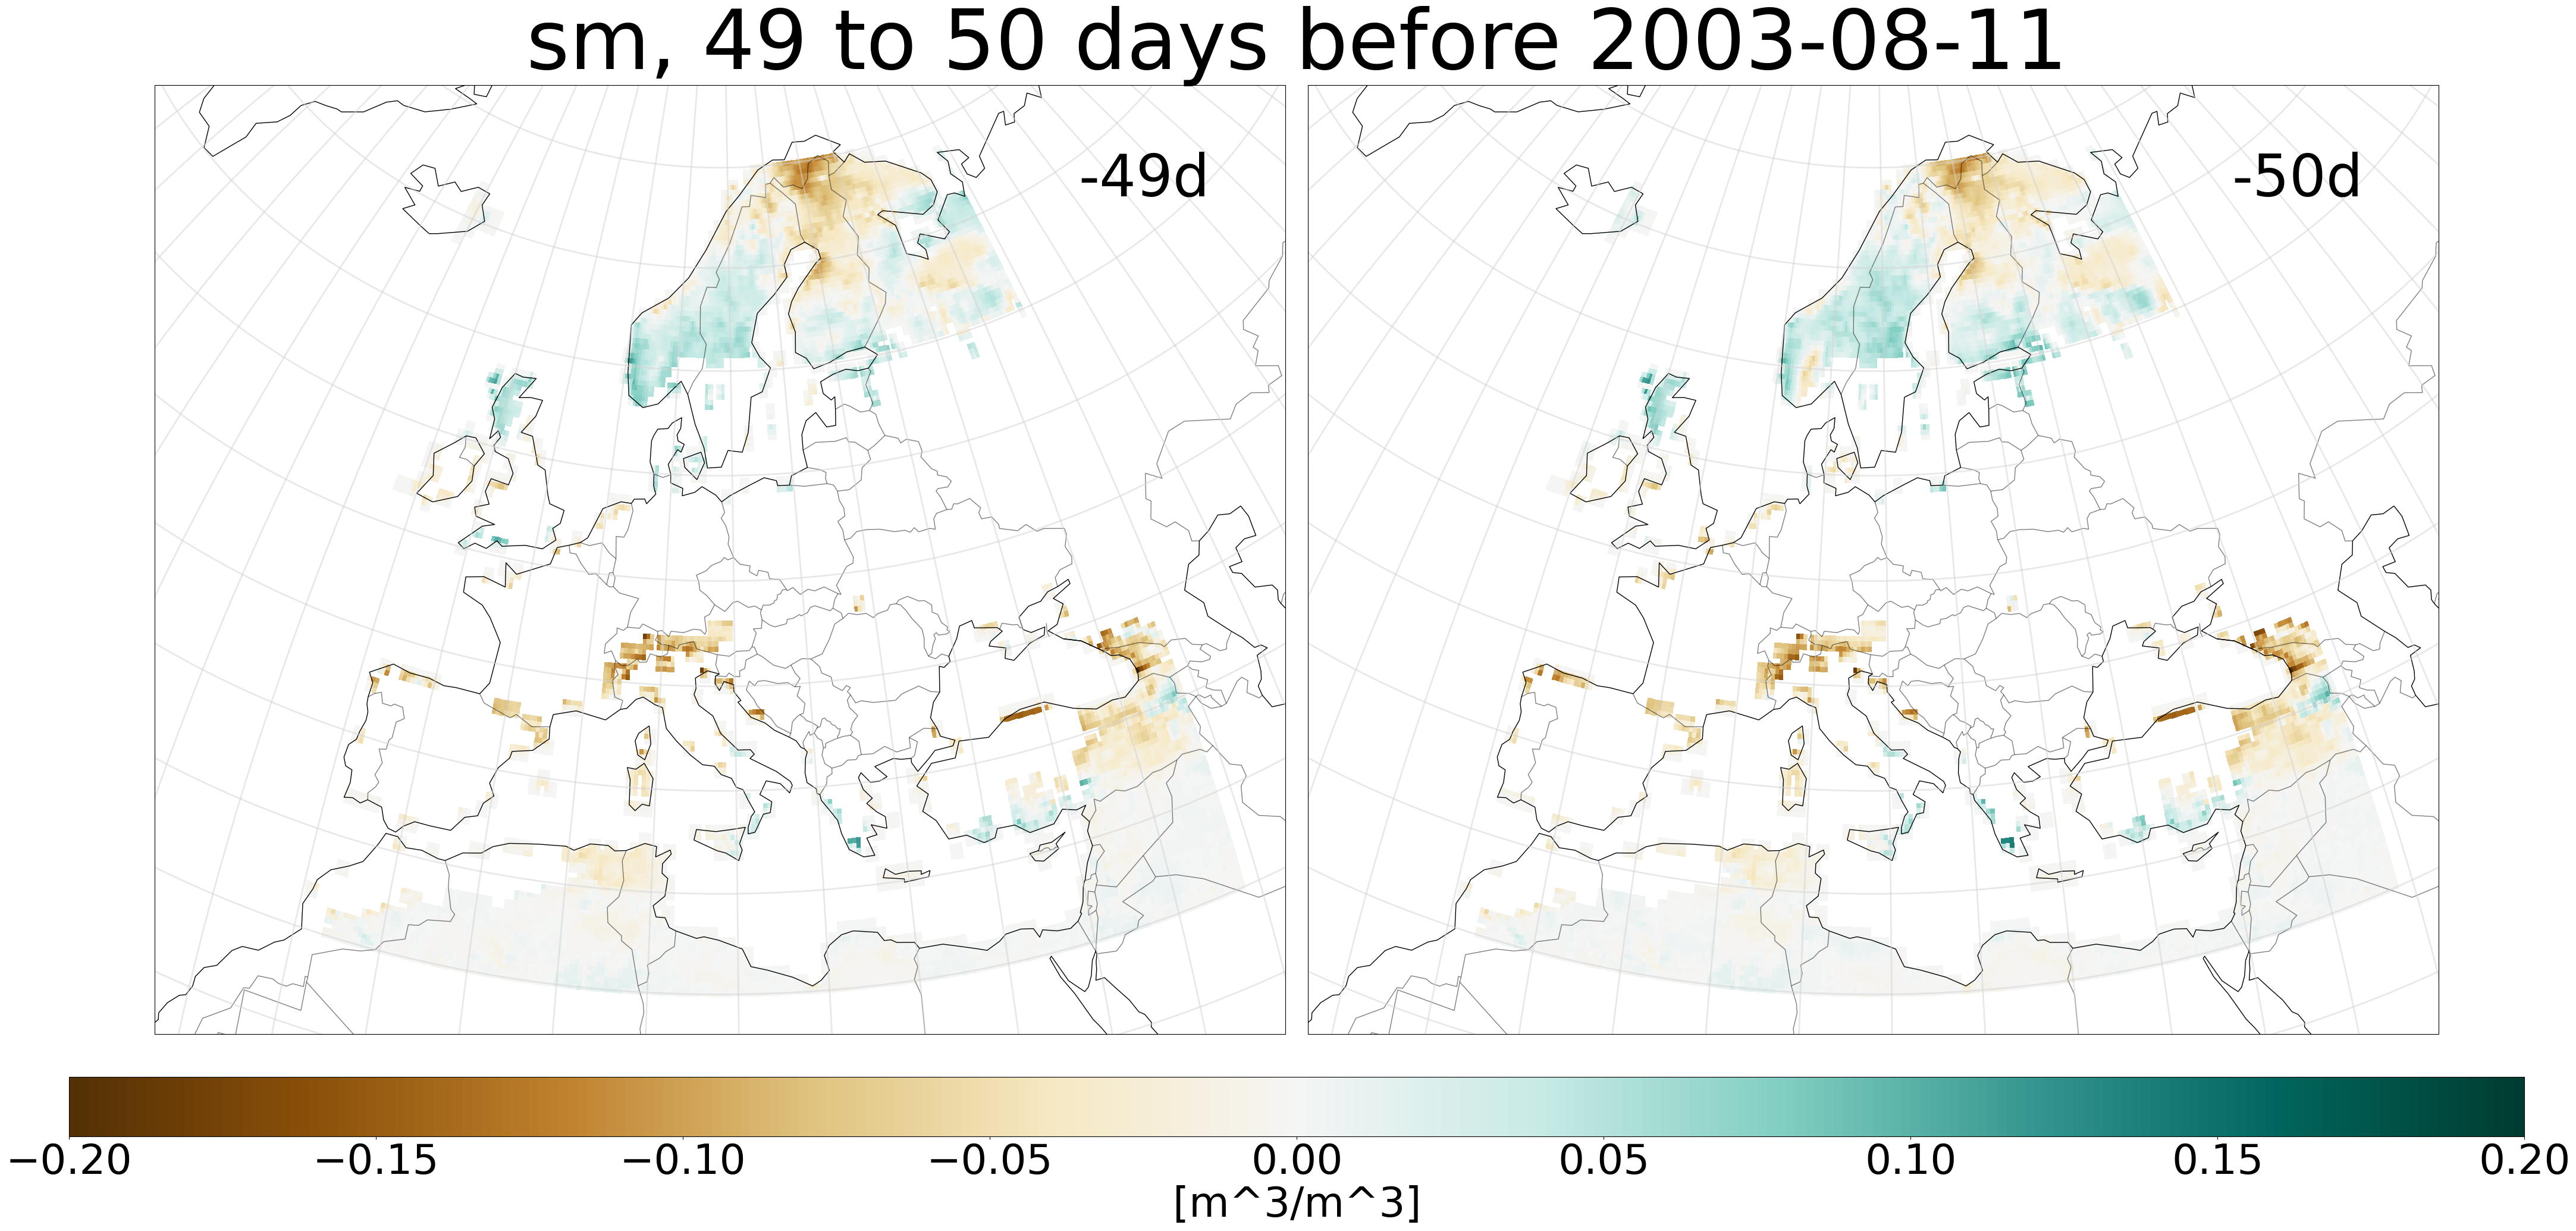

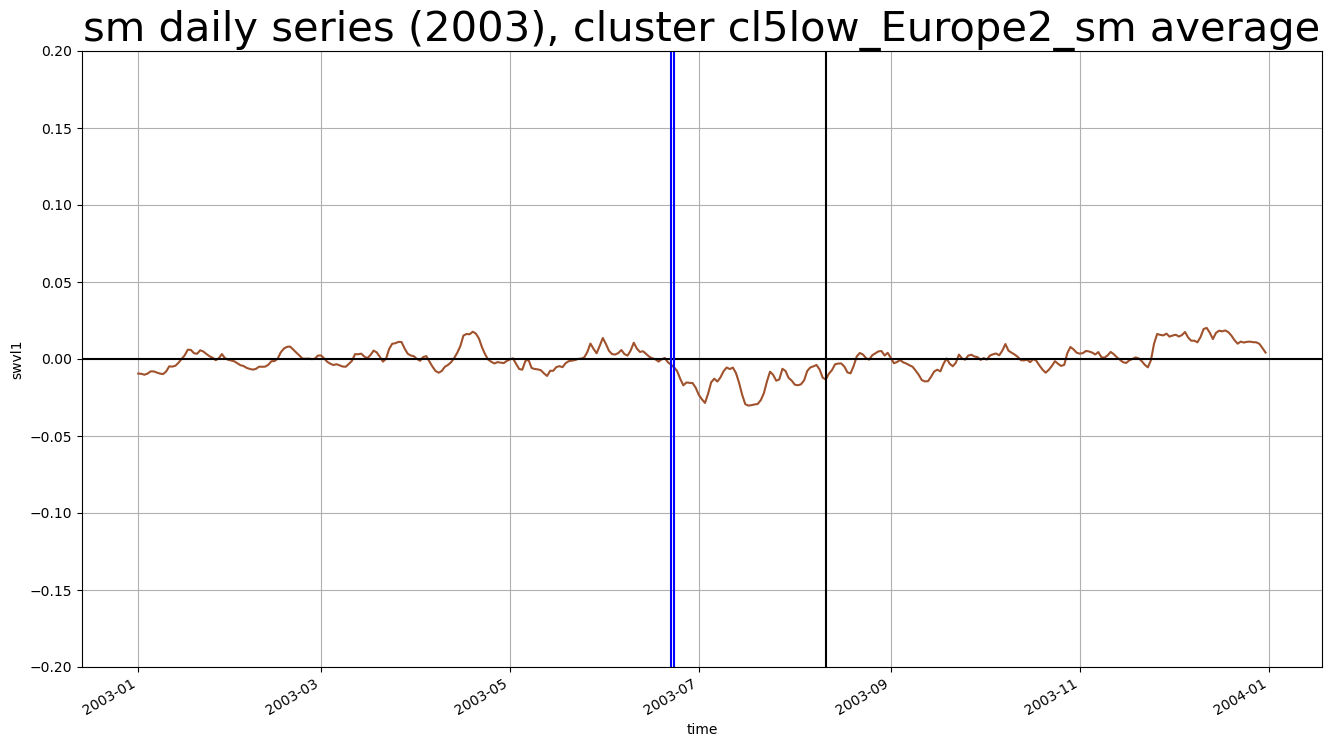

In [ ]:
importlib.reload(clint)
drivers = pd.read_csv(f'{workmetadir}drivers{experiment}_Test.csv')
clint.loop_map_grids(drivers, dates_ts, variables, lsm, modelspecs[modelspecs.kind == kind],
                     modeldir, maskdir, plotdir)

In [44]:
drivers

var     unit era5_var cmip6_var var4path  vmin_x  vmax_x  exp exp_size  \
0  tmax       °C      t2m    tasmax     mx2t   -10.0    10.0    5      low   
1  tmax       °C      t2m    tasmax     mx2t   -10.0    10.0    5      low   
2  mslp      hPa      msl       psl      msl   -20.0    20.0    5      low   
3  mslp      hPa      msl       psl      msl   -20.0    20.0    5      low   
4    sm  m^3/m^3    swvl1     mrsos      sm1    -0.2     0.2    5      low   
5    sm  m^3/m^3    swvl1     mrsos      sm1    -0.2     0.2    5      low   
6    sm  m^3/m^3    swvl1     mrsos      sm1    -0.2     0.2    5      low   

   domain  ...  cl_ext_S cl_ext_N  vmin_y  vmax_y text_plot_lon text_plot_lat  \
0  Europe  ...      42.0     58.0   -10.0    10.0           NaN           NaN   
1  Europe  ...      39.0     63.5   -10.0    10.0           NaN           NaN   
2  Europe  ...      57.0     71.0   -20.0    20.0           NaN           NaN   
3   World  ...     -76.0    -46.5   -20.0    20.0           NaN           NaN   
4  Europe  ...      42.0     62.0    -0.2     0.2           NaN           NaN   
5  Europe  ...      29.0     71.0    -0.2     0.2           NaN           NaN   
6  Europe  ...      34.0     51.0    -0.2     0.2           NaN           NaN   

   fig_width  ax_width  ax_height  empty  
0        NaN       NaN        NaN    NaN  
1        NaN       NaN        NaN    NaN  
2        NaN       NaN        NaN    NaN  
3        NaN       NaN        NaN    NaN  
4        NaN       NaN        NaN    NaN  
5        NaN       NaN        NaN    NaN  
6        NaN       NaN        NaN    NaN  

[7 rows x 34 columns]